In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime

In [2]:
data_raw = pd.read_csv('IVE_tickbidask.txt', header=None, names=['Date','Time','Price','Bid','Ask','Size'])

In [3]:
data = data_raw.iloc[:100000]

In [4]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.drop(columns = ['Date', 'Time'])
data = data.set_index('DateTime')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
from bars import *

In [6]:
# bars = ImbalanceTickBarSeries(data)
# imbtick_bars = bars.process_ticks(init = 100, min_bar = 10, max_bar = 1000)
# print imbtick_bars.head()

In [7]:
bars = VolumeBarSeries(data)
volume_bars = bars.process_ticks(frequency = 10000)
print volume_bars.head()

                     close   high    low   open   volume
DateTime                                                
2009-09-28 09:41:53  50.84  50.85  50.71  50.79  10144.0
2009-09-28 09:46:35  51.07  51.07  50.83  50.85  11900.0
2009-09-28 09:47:25  51.06  51.07  51.05  51.07  10000.0
2009-09-28 09:53:47  51.13  51.15  51.06  51.06  10824.0
2009-09-28 09:54:34  51.13  51.14  51.13  51.13  10851.0


In [8]:
bars = DollarBarSeries(data)
dollar_bars = bars.process_ticks(frequency = 1000000)
print dollar_bars.head()

                     close        dollar    high     low   open  volume
DateTime                                                               
2009-09-28 09:46:34  51.07  1.020027e+06  51.070  50.710  50.79   20044
2009-09-28 09:52:47  51.13  1.073986e+06  51.148  51.050  51.07   21024
2009-09-28 09:54:38  51.13  1.020145e+06  51.150  51.129  51.14   19951
2009-09-28 09:55:26  51.14  1.004999e+06  51.150  51.130  51.13   19652
2009-09-28 10:02:48  51.25  1.020512e+06  51.260  51.080  51.14   19943


In [9]:
bars = BarSeries(data)
time_bars = bars.process_ticks(frequency='10Min')
time_bars = time_bars.dropna(subset=['close'])
print time_bars.head()

                        open   high      low  close  volume
DateTime                                                   
2009-09-28 09:40:00  50.7900  50.85  50.7100  50.81    9197
2009-09-28 09:50:00  50.8100  51.12  50.7833  51.07   26447
2009-09-28 10:00:00  51.0988  51.15  51.0800  51.12   53716
2009-09-28 10:10:00  51.1500  51.29  51.1500  51.27   47673
2009-09-28 10:20:00  51.2800  51.29  51.2100  51.21   30631


In [10]:
bars = TickBarSeries(data)
tick_bars = bars.process_ticks(frequency = 100)
print tick_bars.head()

                     close   high    low   open  volume
DateTime                                               
2009-09-28 09:47:22  51.06  51.07  50.71  50.79   30044
2009-09-28 09:54:38  51.13  51.15  51.06  51.06   28975
2009-09-28 10:00:15  51.21  51.21  51.08  51.13   32841
2009-09-28 10:05:50  51.21  51.28  51.20  51.21   33764
2009-09-28 10:15:13  51.25  51.29  51.19  51.22   37104


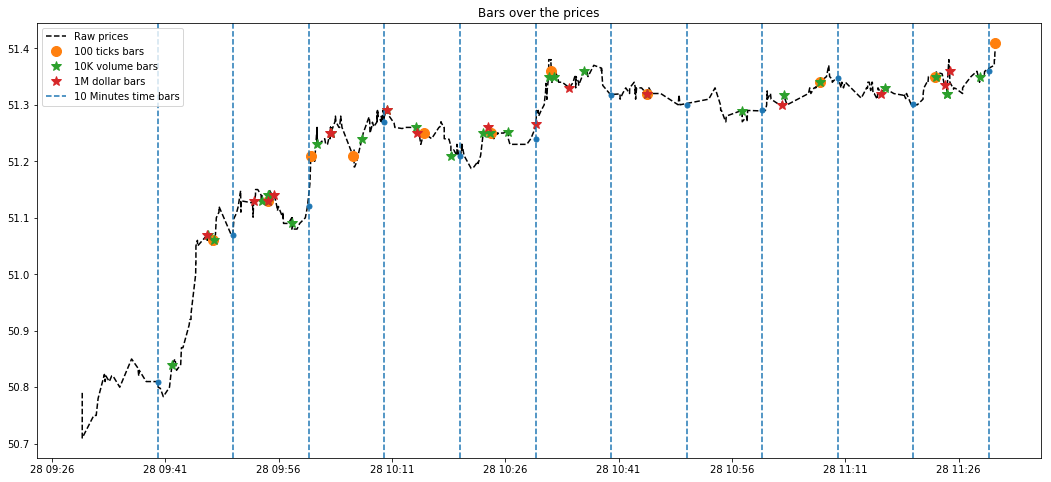

In [53]:
plt.figure(figsize = (18, 8))
plt.title('Bars over the prices')
plt.plot(data.index.values[:1100], data.Price.values[:1100], label = 'Raw prices', ls = '--', color = 'black')
plt.plot(time_bars.index.values[:12], time_bars.close.values[:12], ls = '', markersize = 10, marker = '.')
plt.plot(tick_bars.index.values[:11], tick_bars.close.values[:11], ls = '', markersize = 10, marker = 'o', label = '100 ticks bars')
plt.plot(volume_bars.index.values[:30], volume_bars.close.values[:30], ls = '', markersize = 10, marker = '*', label = '10K volume bars')
plt.plot(dollar_bars.index.values[:16], dollar_bars.close.values[:16], ls = '', markersize = 10, marker = '*', label = '1M dollar bars ')

for e, t in enumerate(time_bars.index.values[:12]):
    if e == 0:
        plt.axvline(t, ls = '--', label = '10 Minutes time bars')
    else:
        plt.axvline(t, ls = '--')

plt.legend()
plt.show()

In [12]:
N_BARS = 100000

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


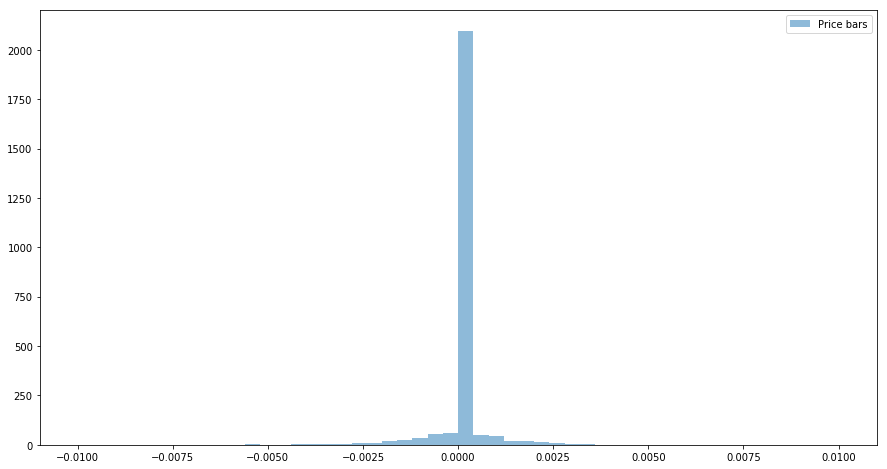

In [13]:
plt.figure(figsize = (15, 8))
plt.hist(time_bars.close.pct_change().dropna().values.tolist()[:N_BARS], label = 'Price bars', alpha = 0.5, normed=True, bins=50, range = (-0.01, 0.01))
# plt.hist(tick_bars.close.pct_change().dropna().values.tolist()[:N_BARS], label = 'Tick bars', alpha = 0.5, normed=True, bins=50, range = (-0.01, 0.01))
# plt.hist(volume_bars.close.pct_change().dropna().values.tolist()[:N_BARS], label = 'Volume bars', alpha = 0.5, normed=True, bins=50, range = (-0.01, 0.01))
# plt.hist(dollar_bars.close.pct_change().dropna().values.tolist()[:N_BARS], label = 'Dollar bars', alpha = 0.5, normed=True, bins=50, range = (-0.01, 0.01))
plt.legend()
plt.show()

In [14]:
print pd.Series.autocorr(time_bars.close.pct_change().dropna()[:N_BARS])
print pd.Series.autocorr(tick_bars.close.pct_change().dropna()[:N_BARS])
print pd.Series.autocorr(volume_bars.close.pct_change().dropna()[:N_BARS])
print pd.Series.autocorr(dollar_bars.close.pct_change().dropna()[:N_BARS])
# print pd.Series.autocorr(imbtick_bars.close.diff().dropna())

print '-' * 10

print np.var(time_bars.close.pct_change().dropna()[:N_BARS])
print np.var(tick_bars.close.pct_change().dropna()[:N_BARS])
print np.var(volume_bars.close.pct_change().dropna()[:N_BARS])
print np.var(dollar_bars.close.pct_change().dropna()[:N_BARS])
# print np.var(imbtick_bars.close.diff().dropna())

-0.030588125306375218
-0.07683926120173647
-0.021983481646673717
-0.06697105174688109
----------
7.7351832147e-07
6.69627624126e-06
2.99889161344e-06
5.6186145009e-06


In [15]:
from scipy import stats

In [16]:
print stats.jarque_bera(time_bars.close.pct_change().dropna()[:N_BARS])
print stats.jarque_bera(tick_bars.close.pct_change().dropna()[:N_BARS])
print stats.jarque_bera(volume_bars.close.pct_change().dropna()[:N_BARS])
print stats.jarque_bera(dollar_bars.close.pct_change().dropna()[:N_BARS])
# print stats.jarque_bera(imbtick_bars.close.diff().dropna())

(11346217.883499108, 0.0)
(12135.453902602945, 0.0)
(118016.0917197462, 0.0)
(16007.585291770612, 0.0)


In [17]:
print stats.shapiro(time_bars.close.pct_change().dropna()[:N_BARS])
print stats.shapiro(tick_bars.close.pct_change().dropna()[:N_BARS])
print stats.shapiro(volume_bars.close.pct_change().dropna()[:N_BARS])
print stats.shapiro(dollar_bars.close.pct_change().dropna()[:N_BARS])
# print stats.shapiro(imbtick_bars.close.diff().dropna())

(0.3610457181930542, 0.0)
(0.8831203579902649, 9.326734838051088e-27)
(0.8196291327476501, 8.407790785948902e-45)
(0.8652165532112122, 9.826826203947629e-31)


/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
len(time_bars), len(tick_bars), len(volume_bars), len(dollar_bars)

(9389, 999, 2262, 1187)